# Analiza glavnih komponenti

Metod glavnih komponenti (engl. principal component analysis, PCA) zasniva se na zapažanju da usled linearnih zavisnosti ili korelacija među atributima podataka, instance ne popunjavaju uniformno prostor atributa, već samo neki njegov linearni potprostor, često značajno manje dimenzije od polaznog. Ukoliko bi se instance predstavile u ortogonalnom koordinatnom sistemu tog prostora i ukoliko bi se dalje radilo sa tim reprezentacijama, mogli bi se umanjiti negativni efekti koju visoka dimenzionalnost i korelisanost atributa imaju.

<img src='assets/PCA.png' style='height: 300px'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(7)

In [3]:
from sklearn.decomposition import PCA

Napravićemo prvo jedan sintetički skup podataka. 

In [4]:
data = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [5]:
data *= 100

In [6]:
data

array([[-100, -100],
       [-200, -100],
       [-300, -200],
       [ 100,  100],
       [ 200,  100],
       [ 300,  200]])

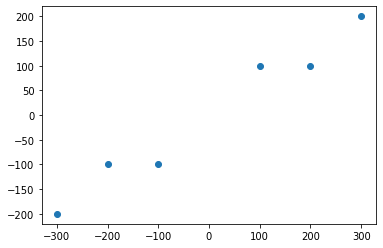

In [7]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [8]:
data.shape

(6, 2)

In [9]:
data_rows = data.shape[0]

In [10]:
data_columns = data.shape[1]

Kreiranom skupu ćemo dodati treću dimenziju, pridružujući nasumično vrednosti instancama.

In [11]:
data_3d = np.ones((data_rows, data_columns + 1))

In [12]:
data_3d[:,0:2] = data

In [13]:
data_3d[:,2] += np.random.random(size=data_rows)

In [14]:
data_3d

array([[-100.        , -100.        ,    1.07630829],
       [-200.        , -100.        ,    1.77991879],
       [-300.        , -200.        ,    1.43840923],
       [ 100.        ,  100.        ,    1.72346518],
       [ 200.        ,  100.        ,    1.97798951],
       [ 300.        ,  200.        ,    1.53849587]])

Bibliotečka podrška analizi glavnih komponenti dolazi kroz `PCA` klasu paketa `decomposition`. Preko parametra `n_components` se zadaje broj željenih glavnih komponenti, metoda `fit` kreira i izračunava matricu kovarijanse i izdvaja glavne komponente, dok se prevođenje u novi koordinatni prostor vrši metodom `transform`. 

In [15]:
pca = PCA(n_components=2)

In [16]:
pca.fit(data_3d)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
data_pca = pca.transform(data_3d) 

In [18]:
data_pca.shape

(6, 2)

Novodobijene reprezentacije tačaka u 2D prostoru su prikazane na grafiku.

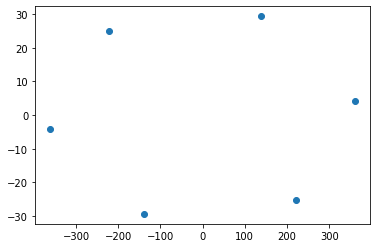

In [19]:
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.show()

Udeo varijanse duž pojedinačnih komponenti se može dobiti svojstvom `explained_variance_ratio_`.

In [20]:
pca.explained_variance_ratio_

array([0.99244185, 0.00755727])

Matrica kovarijanse se može dobiti pozivom funkcije `get_covariance`.

In [21]:
pca.get_covariance()

array([[5.60000000e+04, 3.60000000e+04, 2.68711649e+01],
       [3.60000000e+04, 2.40000000e+04, 2.09080177e+01],
       [2.68711649e+01, 2.09080177e+01, 9.87849378e-02]])

Posebno, inverzna transformacija kojom se tačkama novog prostora pridružuju tačke polaznog prostora se može realizovati korišćenjem funkcije `inverse_transform`. Tako je tačka koja odgovara koordinatnom počektu novog prostora:

In [22]:
pca.inverse_transform([0,0])

array([0.        , 0.        , 1.58909781])